In [50]:
#Import every lib

In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
import seaborn as sns
import seaborn as sns
import datetime
import time
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [38]:
#importing the data
#1) load the given dataset 

In [63]:
cd E:\Data Sci\Machince_Langauage\Ass

E:\Data Sci\Machince_Langauage\Ass


In [64]:
data = pd.read_csv("Ass-4.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
#2) print all the column names

In [65]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
#3) describe the data

In [66]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#4) check the null value 

In [67]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
data=data.drop(["Name"],axis=1)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
#5) if there are Null values, Handle these

In [72]:
data = data.dropna()

In [74]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
#Part-2: Working with Models

In [21]:
#1) Create the target data and feature data where target data is survived

In [75]:
Y = data["Survived"]
X = data.drop(["Survived"],axis = 1)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Sex          183 non-null    object 
 4   Age          183 non-null    float64
 5   SibSp        183 non-null    int64  
 6   Parch        183 non-null    int64  
 7   Ticket       183 non-null    object 
 8   Fare         183 non-null    float64
 9   Cabin        183 non-null    object 
 10  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 17.2+ KB


In [33]:
#Categrorical into measure

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
enc =LabelEncoder()

In [78]:
X['Sex'] = enc.fit_transform(X['Sex'])

In [80]:
X['Ticket'] = enc.fit_transform(X['Ticket'])

In [81]:
X['Cabin'] = enc.fit_transform(X['Cabin'])

In [82]:
X['Embarked'] = enc.fit_transform(X['Embarked'])

In [23]:
#2) Split the data into Training and testing Set

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [84]:
print("Shape of X traning data:- ",X_train.shape)
print("Shape of Y traning data:- ",Y_train.shape)
print("Shape of X testing data:- ",X_test.shape)
print("Shape of Y testing data:- ",Y_test.shape)

Shape of X traning data:-  (146, 10)
Shape of Y traning data:-  (146,)
Shape of X testing data:-  (37, 10)
Shape of Y testing data:-  (37,)


In [27]:
#3) Create a Logistic regression model for Target and feature data 

In [85]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [87]:
model.fit(X_train,Y_train)

LogisticRegression()

In [88]:
model.score(X_test,Y_test)

0.8378378378378378

In [89]:
Y_predicted = model.predict(X_test)

In [90]:
Y_predicted

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
#4) Display the Confusion Matrix

In [91]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_predicted,labels=[1,0])
cnf_matrix

array([[23,  4],
       [ 2,  8]], dtype=int64)

In [ ]:
#5) Find the Accuracy Score 

In [92]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [94]:
accuracy = metrics.accuracy_score(Y_test, Y_predicted)

In [95]:
accuracy_percentage = 100 * accuracy
accuracy_percentage

83.78378378378379

In [96]:
#6) Find the Precision Score

In [97]:
from sklearn.metrics import precision_score, recall_score

In [98]:
print("Precision:",precision_score(Y_test, Y_predicted))

Precision: 0.92


In [99]:
#7) Find the Recall Score

In [100]:
print("Recall:",recall_score(Y_test, Y_predicted))

Recall: 0.8518518518518519


In [101]:
#8) Find the F1 Score 

In [102]:
from sklearn.metrics import f1_score

In [103]:
print("F1 Score:",f1_score(Y_test, Y_predicted))

F1 Score: 0.8846153846153846


In [104]:
#9) Find the probability of testing data

In [105]:
y_prob = model.predict_proba(X_test)

In [106]:
y_prob

array([[0.1143541 , 0.8856459 ],
       [0.11387878, 0.88612122],
       [0.55897897, 0.44102103],
       [0.1234553 , 0.8765447 ],
       [0.06843882, 0.93156118],
       [0.2034036 , 0.7965964 ],
       [0.7126686 , 0.2873314 ],
       [0.68144437, 0.31855563],
       [0.81638654, 0.18361346],
       [0.53702895, 0.46297105],
       [0.5269863 , 0.4730137 ],
       [0.05041218, 0.94958782],
       [0.77104673, 0.22895327],
       [0.18027121, 0.81972879],
       [0.10023636, 0.89976364],
       [0.57041131, 0.42958869],
       [0.49261973, 0.50738027],
       [0.51332343, 0.48667657],
       [0.26452424, 0.73547576],
       [0.07896999, 0.92103001],
       [0.59830864, 0.40169136],
       [0.1501244 , 0.8498756 ],
       [0.36375939, 0.63624061],
       [0.28659989, 0.71340011],
       [0.39707144, 0.60292856],
       [0.16525548, 0.83474452],
       [0.75003361, 0.24996639],
       [0.15796472, 0.84203528],
       [0.45996078, 0.54003922],
       [0.30761687, 0.69238313],
       [0.

In [107]:
#10) Display ROC Curve and find the AUC score

In [108]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

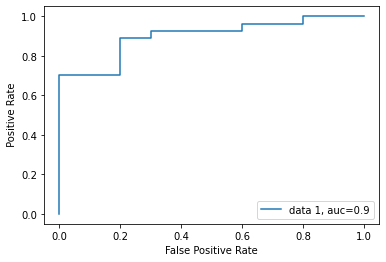

In [110]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, threshold = roc_curve(Y_test,  y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()